In [1]:
import pandas as pd


df = pd.read_csv("C:\\Users\\gutil\\OneDrive - Universidad de los andes\\Escritorio\\Ingenieria Industrial\\2024-01\\Analitica Computacional Para la Toma de Decisiones\\Proyecto\\Proyecto 3\\icfes_resultados.csv")
print('Tamaño completo: ', df.shape)

df = df.drop_duplicates()
print('Tamaño sin filas completas duplicadas, ',  df.shape)

df = df.drop_duplicates(subset='estu_consecutivo')
print('Tamaño sin llaves duplicadas ', df.shape)


df = df.drop('punt_matematicas', axis=1)
df = df.drop('punt_ingles', axis=1)
df = df.drop('punt_sociales_ciudadanas', axis=1)
df = df.drop('punt_c_naturales', axis=1)
df = df.drop('punt_global', axis=1)

print('Tamaño sin el resto de puntajes ', df.shape )

df = df.dropna()
print('Tamaño sin valores faltantes ', df.shape)

valores = df['punt_lectura_critica']
valores  = valores.tolist()

valores_str_replace = [val.replace(',', '.') if isinstance(val, str) else val for val in valores]
vstr = pd.to_numeric(valores_str_replace, errors='raise', downcast='float')

df_puntaje = df

df_puntaje['punt_lectura_critica'] = vstr

print(df_puntaje['periodo'].unique())



Tamaño completo:  (470818, 51)
Tamaño sin filas completas duplicadas,  (377679, 51)
Tamaño sin llaves duplicadas  (377678, 51)
Tamaño sin el resto de puntajes  (377678, 46)
Tamaño sin valores faltantes  (176827, 46)
[20152 20194 20142 20162 20172 20211 20161 20181 20171 20201 20151 20191
 20224 20221]


In [2]:
df_completo = df_puntaje

df = pd.DataFrame()

df['fami_cuartoshogar'] = df_completo['fami_cuartoshogar']
df['intercepto'] = 1
df['fami_educacionmadre'] = df_completo['fami_educacionmadre']
df['fami_educacionpadre'] = df_completo['fami_educacionpadre']
df['fami_estratovivienda'] = df_completo['fami_estratovivienda']
df['fami_personashogar'] = df_completo['fami_personashogar']
df['fami_tieneautomovil'] = df_completo['fami_tieneautomovil']
df['fami_tienecomputador'] = df_completo['fami_tienecomputador']
df['fami_tieneinternet'] = df_completo['fami_tieneinternet']
df['fami_tienelavadora'] = df_completo['fami_tienelavadora']




<Figure size 2000x1000 with 0 Axes>

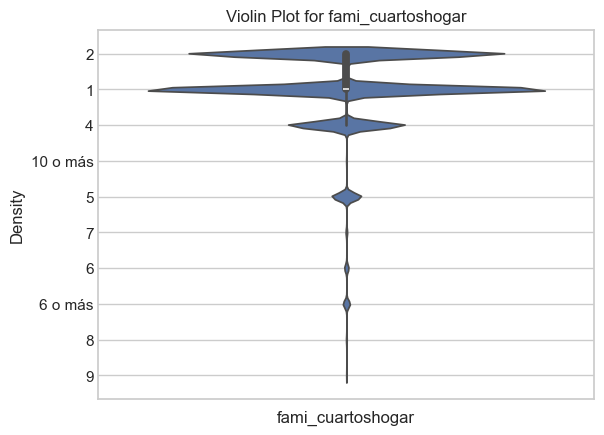

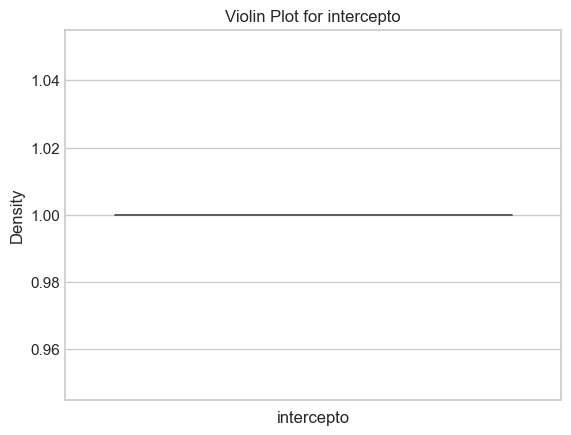

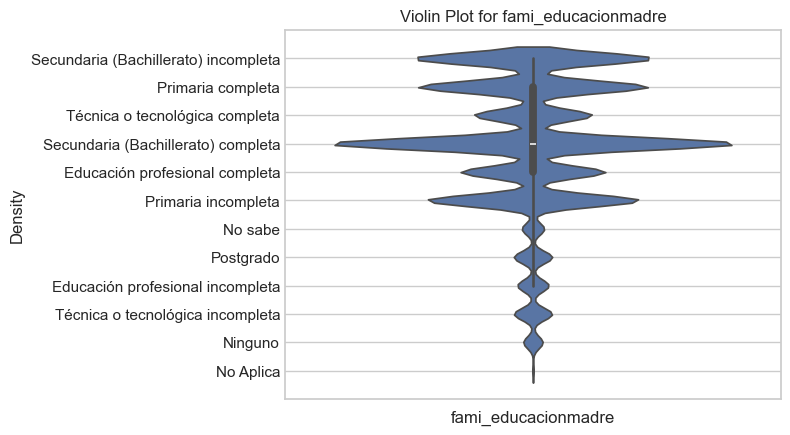

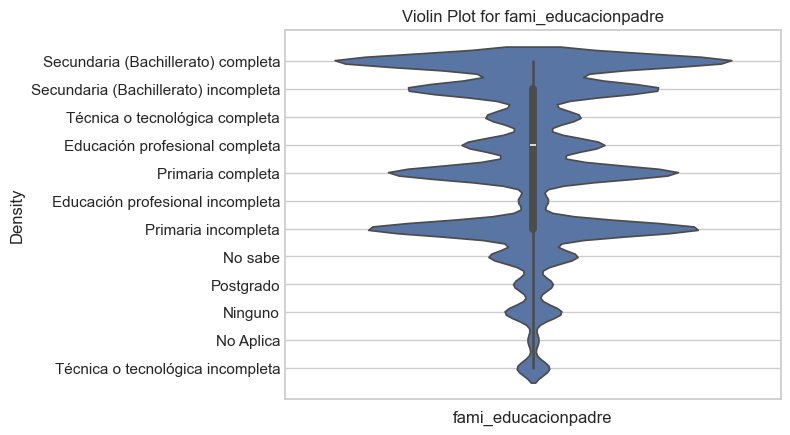

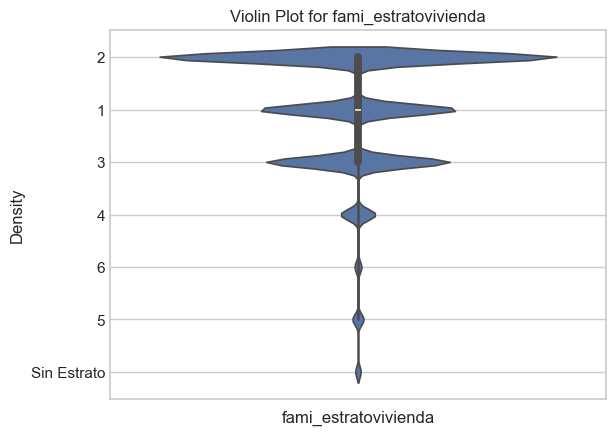

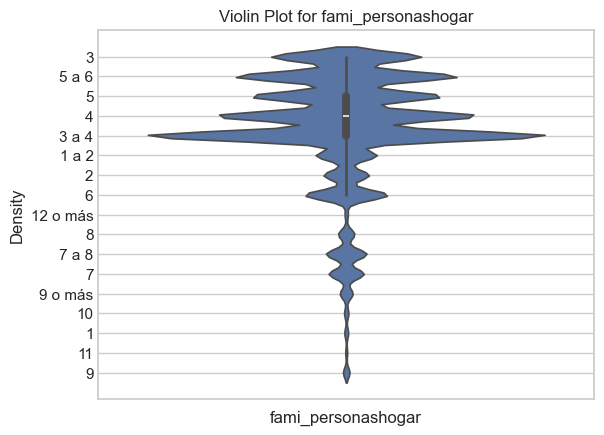

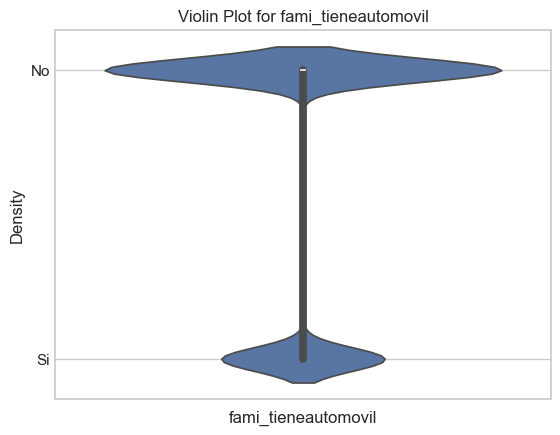

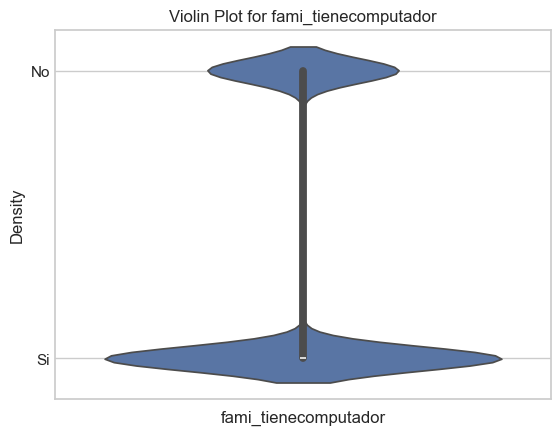

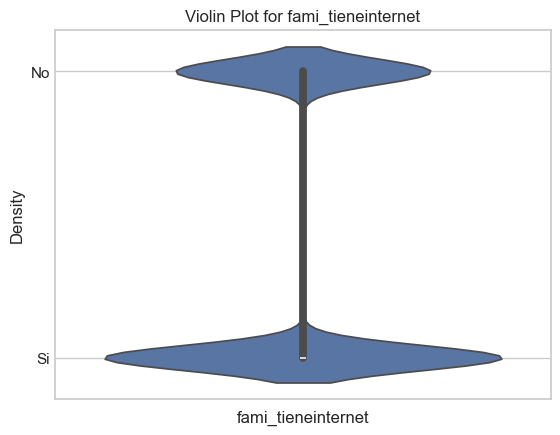

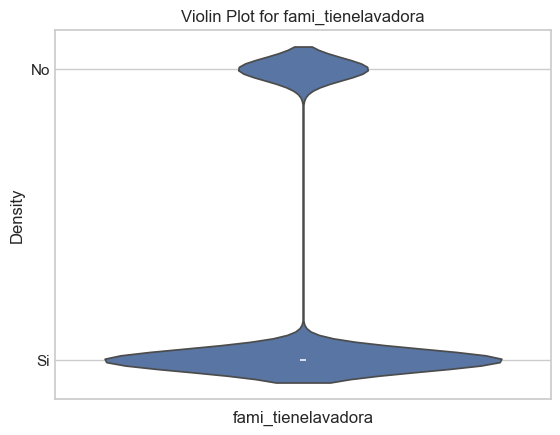

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

for i, column in enumerate(df.columns):
    plt.figure(i)
    sns.violinplot(data=df[column])
    plt.title(f'Violin Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.tick_params(axis='both', which='both', length=0)
    plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['fami_cuartoshogar'], dtype = int)

df = pd.get_dummies(df, columns=['fami_educacionmadre'], dtype = int)
df.drop('fami_educacionmadre_No Aplica', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['fami_educacionpadre'], dtype = int)
df.drop('fami_educacionpadre_No Aplica', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['fami_estratovivienda'], dtype = int)
df.drop('fami_estratovivienda_Sin Estrato', axis=1, inplace=True)

df = pd.get_dummies(df, columns=['fami_personashogar'], dtype = int)

df = pd.get_dummies(df, columns=['fami_tieneautomovil'], dtype = int)

df = pd.get_dummies(df, columns=['fami_tienecomputador'], dtype = int)

df = pd.get_dummies(df, columns=['fami_tieneinternet'], dtype = int)

df = pd.get_dummies(df, columns=['fami_tienelavadora'], dtype = int)


<function matplotlib.pyplot.show(close=None, block=None)>

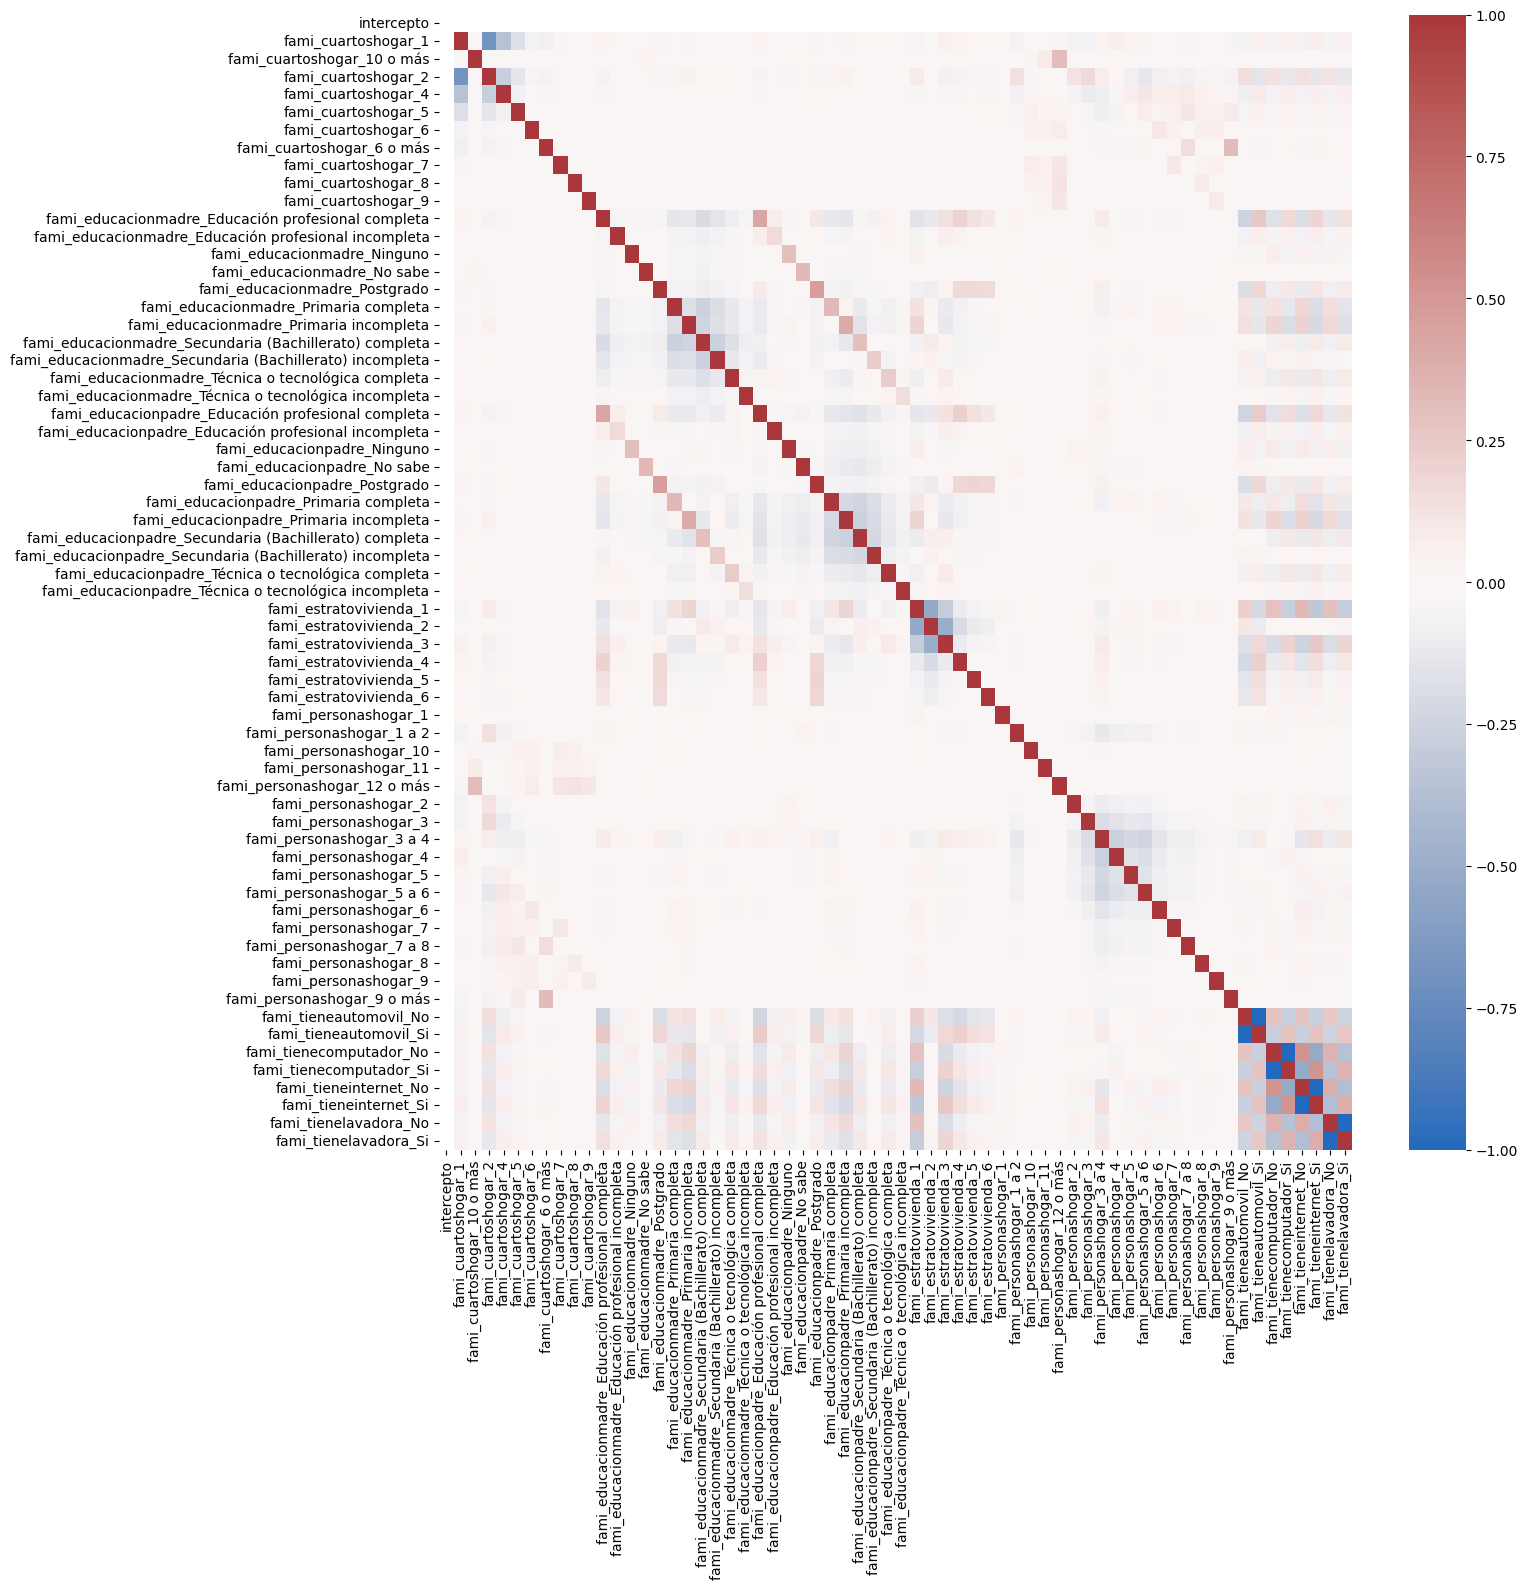

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion = df.corr()

plt.figure(figsize = (16,16))

sns.heatmap(correlacion, annot = False, cmap = 'vlag', fmt = '2f')

plt.tight_layout()

plt.show